## This program is made to track the rigid body variablity in a tral

In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import sys

# Set the save game location
# Must have format of "../PointerExperimentData/Name_dd_mm__hh_mm_metadata" with no file extension
saveFile = "../PointerExperimentData/Ashwin_13_02"
saveGameLocation = saveFile + "/Ash_13_02_13_19" # must have format of "Name_dd_mm__hh_mm_metadata" with no file extension

sys.path.insert(0,'/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaces')

from Experiment_pointer.experimentFunctions import processTrialData
DOFOffset = 0.03
from sklearn.decomposition import PCA
from lib_streamAndRenderDataWorkflows.config_streaming import bodyParts


In [2]:
# Fetch all trial information

rigidBodies1, cursorPos1,cursorVel1,goCues1,targetHits1,timeStamps1, minDof1,maxDof1,c = processTrialData(saveGameLocation + "_test",DOFOffset)# make this test 
rigidBodies2, cursorPos2,cursorVel2,goCues2,targetHits2,timeStamps2, minDof2,maxDof2,d = processTrialData(saveGameLocation + "_training1",DOFOffset)
rigidBodies3, cursorPos3,cursorVel3,goCues3,targetHits3,timeStamps3, minDof3,maxDof3,e = processTrialData(saveGameLocation + "_training2",DOFOffset)
rigidBodies4, cursorPos4,cursorVel4,goCues4,targetHits4,timeStamps4, minDof4,maxDof4,f = processTrialData(saveGameLocation + "_training3",DOFOffset)
rigidBodies5, cursorPos5,cursorVel5,goCues5,targetHits,timeStamps5, minDof5,maxDof5,g = processTrialData(saveGameLocation + "_training4",DOFOffset)

pygame 2.5.2 (SDL 2.28.3, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [6]:


def extractPCAFromRigidBodies(rigidBodyVector):
    """
    Function that performs pca on each rigid body in rigid body vector to extract out main variations of each rigid body during trial
    """
    dimensionalityReducedRigidBodyVector = np.zeros((rigidBodyVector.shape[0],38))
    for rigidBodyIdx in range(0,19):

        
        # Retrieve current rigid body vector
        idxStart = rigidBodyIdx * 6
        idxEnd = idxStart + 6
        currRigidBody = rigidBodyVector[:,idxStart:idxEnd]
        rigidBodyPCA = PCA(n_components=2)
        X_new = rigidBodyPCA.fit_transform(currRigidBody)
        vars = rigidBodyPCA.explained_variance_ratio_
        if len(vars) == 2:
            print("Rigid Body: {}, variance explained in PC1: {}, and in PC2: {}".format(bodyParts[rigidBodyIdx],vars[0],vars[1]))
        elif len(vars) == 3:
            print("Rigid Body: {}, variance explained in PC1: {}, and in PC2: {} , and in PC3: {}".format(bodyParts[rigidBodyIdx],vars[0],vars[1],vars[2]))
        
        dimensionalityReducedRigidBodyVector[:,rigidBodyIdx*2:rigidBodyIdx*2+2] = X_new
        # Run pca to get the two most common components 

    return dimensionalityReducedRigidBodyVector


def findBodyPart(bodyPart):
    idx = bodyParts.index(bodyPart)
    return [idx, idx + 2]


Rigid Body: Pelvis, variance explained in PC1: 0.4436741992477651, and in PC2: 0.37505344427786813
Rigid Body: Ab, variance explained in PC1: 0.4127000636303773, and in PC2: 0.3283371091563282
Rigid Body: Chest, variance explained in PC1: 0.3781375974062424, and in PC2: 0.36752118103207765
Rigid Body: Neck, variance explained in PC1: 0.5683801716556913, and in PC2: 0.19639081593548569
Rigid Body: Head, variance explained in PC1: 0.5442485591250074, and in PC2: 0.20658707223382589
Rigid Body: LShoulder, variance explained in PC1: 0.4332400983461074, and in PC2: 0.3036191187146235
Rigid Body: LUArm, variance explained in PC1: 0.544055269464054, and in PC2: 0.2575896927332602
Rigid Body: LFArm, variance explained in PC1: 0.5602241554288342, and in PC2: 0.2112555257504402
Rigid Body: LHand, variance explained in PC1: 0.6030827531793554, and in PC2: 0.1663248138291031
Rigid Body: RShoulder, variance explained in PC1: 0.4179827032650251, and in PC2: 0.2972335268377945
Rigid Body: RUArm, vari

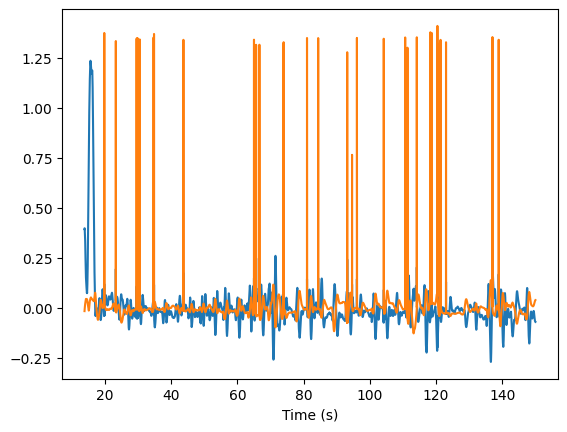

In [7]:
# Let's find the two principal components of each rigid body so reduce it from 114 to 38
rigidBodyVector = rigidBodies1 # This will later be set as an iterable
dimensionalityReducedRigidBodyVector = np.zeros((rigidBodyVector.shape[0],2*19))
dimensionalityReducedRigidBodyVector = extractPCAFromRigidBodies(rigidBodyVector)
# Pass the correct trial to the timestamp vector in seconds
timeStampVector =  timeStamps1  / 1000 #

# Iterate through rigid bodies to extract PCs for each

# Plot PC1 and PC2 for rigid bodies
print(dimensionalityReducedRigidBodyVector.shape)
righthandIndexes = findBodyPart("RHand")
plt.plot(timeStampVector,dimensionalityReducedRigidBodyVector[:,righthandIndexes[0]:righthandIndexes[1]])

plt.xlabel("Time (s)")
plt.show()



[[1.         0.61758813]
 [0.61758813 1.        ]]
[[ 1.         -0.52705908]
 [-0.52705908  1.        ]]
[[1.         0.81852301]
 [0.81852301 1.        ]]
[[ 1.         -0.44167994]
 [-0.44167994  1.        ]]
[[1.         0.82234942]
 [0.82234942 1.        ]]
[[1.         0.39025672]
 [0.39025672 1.        ]]
[[1.         0.56376936]
 [0.56376936 1.        ]]
[[1.         0.21591935]
 [0.21591935 1.        ]]
[[1.         0.15096362]
 [0.15096362 1.        ]]
[[1.         0.56927732]
 [0.56927732 1.        ]]
[[ 1.         -0.60702583]
 [-0.60702583  1.        ]]
[[1.         0.62586359]
 [0.62586359 1.        ]]
[[1. 1.]
 [1. 1.]]
[[ 1.00000000e+00 -5.97196229e-16]
 [-5.97196229e-16  1.00000000e+00]]
[[1.         0.74378452]
 [0.74378452 1.        ]]
[[1.         0.17562508]
 [0.17562508 1.        ]]
[[ 1.         -0.72307024]
 [-0.72307024  1.        ]]
[[1.         0.24804535]
 [0.24804535 1.        ]]
[[1.         0.85121913]
 [0.85121913 1.        ]]


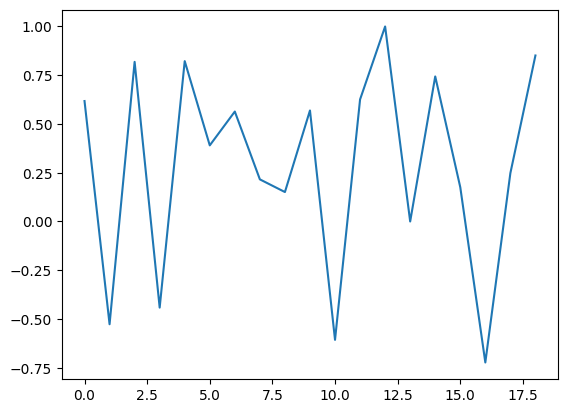

In [8]:
# Assess correlation coefficient for all parts of the body with the right hand

# Fetch Right hand principal component
rightHandPrincipalComponent = dimensionalityReducedRigidBodyVector[:,findBodyPart("RHand")[0]]

pearsonCoeffs = np.zeros(len(bodyParts))



for idx,bodyPart in enumerate(bodyParts):
    # Fetch body part principal component
    bodyPartPrincipalComponent = dimensionalityReducedRigidBodyVector[:, findBodyPart(bodyPart)[0]]

    # Calculate correlation coefficient
    corrCoeff = np.corrcoef(rightHandPrincipalComponent,bodyPartPrincipalComponent)
    print(corrCoeff)
    pearsonCoeffs[idx] = corrCoeff[0,1]

    

plt.plot(pearsonCoeffs)
